In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler


In [2]:
##Input

In [3]:
data_set = pd.read_csv('/Users/ankur/Documents/healthcare-dataset-stroke-data.csv')
print(data_set.shape)
f_title = data_set.columns

(5110, 12)


In [4]:
##Data Preprocessing

In [5]:
def get_mean(column):
    sum = 0
    cnt = 0
    for i in range(len(column)):
        if not pd.isnull(column[i]):
            try:
                sum += float(str(column[i]).strip())
                cnt += 1
                # print(i, column[i])
            except (ValueError, TypeError) as e:
                cnt = cnt
                # print(f"Error: {e}")
                # print(i, column[i])
    print (sum/cnt)            
    return sum / cnt        

# mean(data_set['rc'])

In [6]:
## Replace Numeric Empty Cell with previous value

In [7]:
import pandas as pd
data_set = pd.read_csv('/Users/ankur/Documents/healthcare-dataset-stroke-data.csv')
data_set.fillna(method='ffill', inplace=True)
data_set['age'].fillna(method='ffill', inplace=True)
print(data_set.head())



      id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21  36.6     never smoked   
2        Private          Rural             105.92  32.5     never smoked   
3        Private          Urban             171.23  34.4           smokes   
4  Self-employed          Rural             174.12  24.0     never smoked   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  


/var/folders/4r/ms3gmwjx0hl4j6lytn02stbc0000gn/T/ipykernel_43985/4118702225.py:3: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  data_set.fillna(method='ffill', inplace=True)
/var/folders/4r/ms3gmwjx0hl4j6lytn02stbc0000gn/T/ipykernel_43985/4118702225.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_set['age'].fillna(method='ffill', inplace=True)
/var/folders/4r/ms3gmwjx0hl4j6lytn02stbc0000gn/T/ipykernel_43985/4118702225.py:4: Fut

In [8]:
## Replace Text data to binary and empty cell as random

In [26]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder


data_set = pd.read_csv('/Users/ankur/Documents/healthcare-dataset-stroke-data.csv')


data_set['gender'] = data_set['gender'].map({'Male': 0, 'Female': 1})


le = LabelEncoder()


if 'smoking_status' in data_set.columns:
    data_set['smoking_status'] = le.fit_transform(data_set['smoking_status'].astype(str))

# Map 'hypertension' to numerical values
data_set['hypertension'] = data_set['hypertension'].map({'Yes': 1, 'No': 0})

# Fill missing numerical values with random integers
for col in data_set.columns:
    if data_set[col].dtype in ['float64', 'int64']:  # For numerical columns
        data_set[col].fillna(np.random.randint(0, 100), inplace=True)


print(data_set.head())


      id  gender   age  hypertension  heart_disease ever_married  \
0   9046     0.0  67.0          46.0              1          Yes   
1  51676     1.0  61.0          46.0              0          Yes   
2  31112     0.0  80.0          46.0              1          Yes   
3  60182     1.0  49.0          46.0              0          Yes   
4   1665     1.0  79.0          46.0              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi  smoking_status  \
0        Private          Urban             228.69  36.6               1   
1  Self-employed          Rural             202.21  41.0               2   
2        Private          Rural             105.92  32.5               2   
3        Private          Urban             171.23  34.4               3   
4  Self-employed          Rural             174.12  24.0               2   

   stroke  
0       1  
1       1  
2       1  
3       1  
4       1  


/var/folders/4r/ms3gmwjx0hl4j6lytn02stbc0000gn/T/ipykernel_43985/930630258.py:24: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data_set[col].fillna(np.random.randint(0, 100), inplace=True)


In [ ]:
## Visualize Selected Features 

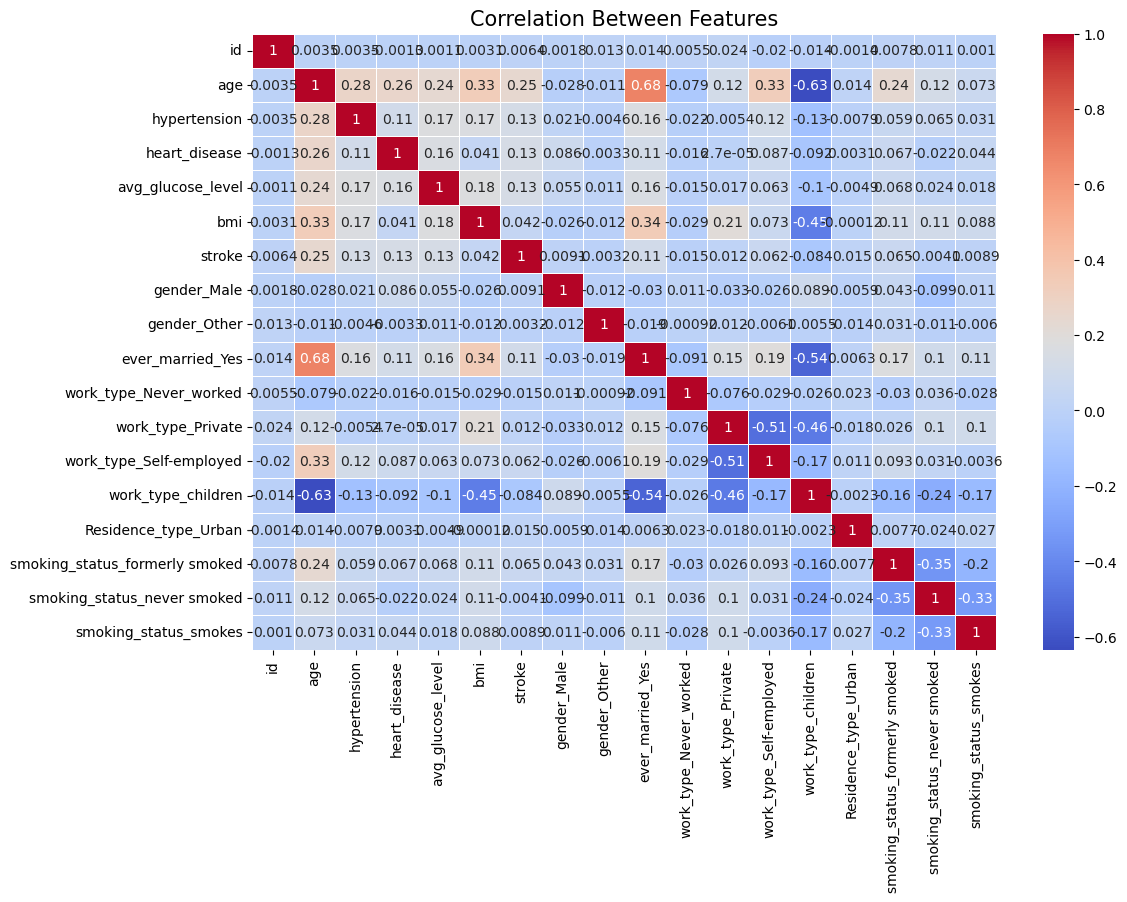

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
data_set = pd.read_csv('/Users/ankur/Documents/healthcare-dataset-stroke-data.csv')

data_set_encoded = pd.get_dummies(data_set, drop_first=True)
correlation_matrix = data_set_encoded.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Between Features', size=15)
plt.show()


In [ ]:
##Split dependent and independent data

In [14]:
x = data_set.iloc[:,:-1]
y = data_set.iloc[:, -1]
print(x.shape, y.shape)

(5110, 11) (5110,)


In [ ]:
# Feature Selection

In [ ]:
## 1. Recursive Feature Elimination (RFE):

In [29]:


X = data_set_encoded.drop('stroke', axis=1)  # 'stroke' is the target variable
y = data_set_encoded['stroke']


imputer = SimpleImputer(strategy='median')
X_imputed = imputer.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Use SVC with a linear kernel as the estimator for RFE (Recursive Feature Elimination)
estimator = SVC(kernel="linear")
selector = RFE(estimator, n_features_to_select=10, step=1)  # Adjust n_features_to_select as needed
selector = selector.fit(X_train, y_train)


selected_features = selector.support_
feature_names = data_set_encoded.drop('stroke', axis=1).columns
selected_feature_names = feature_names[selected_features]


print(f"Number of selected features: {len(selected_feature_names)}")
print("Selected features:")
print(selected_feature_names)


Number of selected features: 10
Selected features:
Index(['id', 'heart_disease', 'bmi', 'gender_Male', 'ever_married_Yes',
       'work_type_Private', 'work_type_Self-employed', 'work_type_children',
       'smoking_status_formerly smoked', 'smoking_status_never smoked'],
      dtype='object')


In [ ]:
## Visualize Selected Features


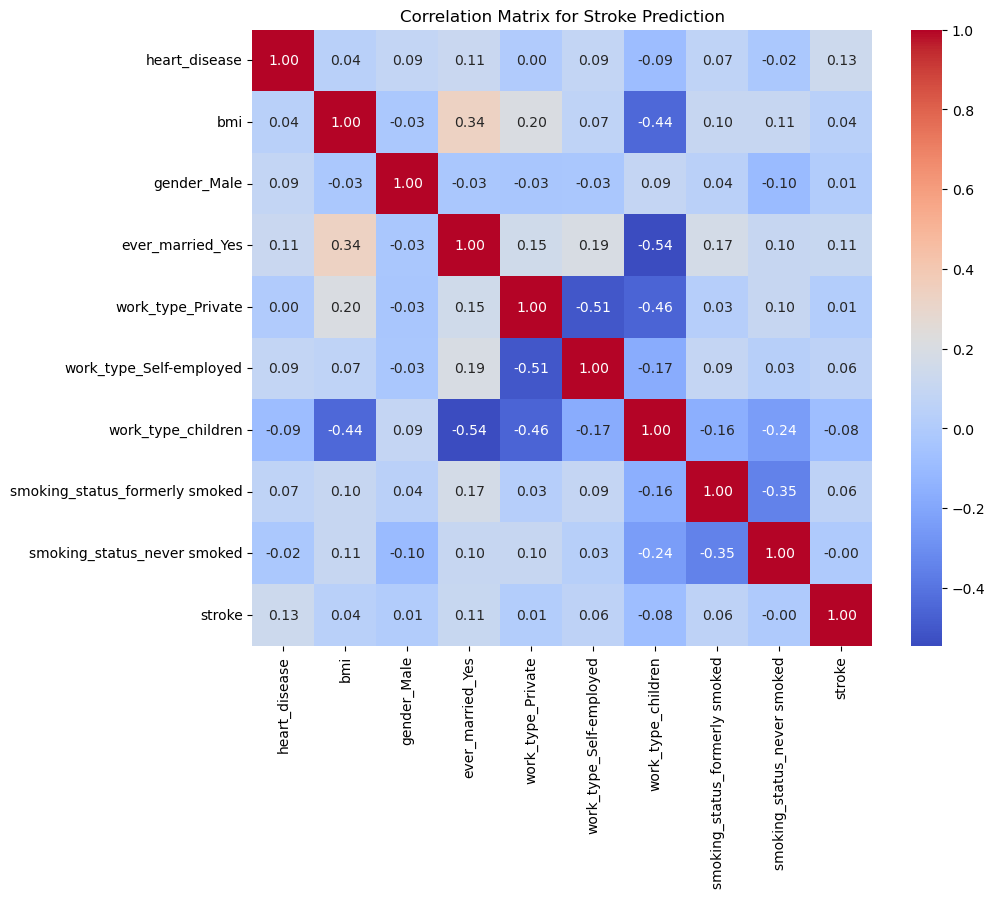

In [16]:

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
data_set = pd.read_csv('/Users/ankur/Documents/healthcare-dataset-stroke-data.csv')

data_set['bmi'] = data_set['bmi'].fillna(data_set['bmi'].mean())
data_encoded = pd.get_dummies(data_set, drop_first=True)

selected_features = ['heart_disease', 'bmi', 'gender_Male', 'ever_married_Yes', 
                     'work_type_Private', 'work_type_Self-employed', 'work_type_children', 
                     'smoking_status_formerly smoked', 'smoking_status_never smoked', 'stroke']
data_subset = data_encoded[selected_features]
corr_matrix = data_subset.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix for Stroke Prediction')
plt.show()


In [ ]:
## Split Train Test dataset

In [17]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
data_set = pd.read_csv('/Users/ankur/Documents/healthcare-dataset-stroke-data.csv')

data_set['bmi'] = data_set['bmi'].fillna(data_set['bmi'].mean())

data_encoded = pd.get_dummies(data_set, drop_first=True)

X = data_encoded.drop(columns=['stroke'])  # Features
y = data_encoded['stroke']                # Target (the stroke outcome)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)

x_test_scaled = scaler.transform(x_test)

# Print the shapes of the split and scaled datasets
print("Training data shape:", x_train_scaled.shape)
print("Testing data shape:", x_test_scaled.shape)
print("Training labels shape:", y_train.shape)
print("Testing labels shape:", y_test.shape)


Training data shape: (3577, 17)
Testing data shape: (1533, 17)
Training labels shape: (3577,)
Testing labels shape: (1533,)


In [18]:
# Assuming 'X' is the feature matrix and 'y' is the target (stroke column)
# Select 9 features (excluding 'stroke' as it is the target)
x_selected = X[['heart_disease', 'bmi', 'gender_Male', 'ever_married_Yes', 
                'work_type_Private', 'work_type_Self-employed', 'work_type_children', 
                'smoking_status_formerly smoked', 'smoking_status_never smoked']]

# The target is 'stroke'
y = data_set['stroke']

x_train_fs, x_test_fs, y_train_fs, y_test_fs = train_test_split(x_selected, y, test_size=0.3, random_state=42)
scaler = StandardScaler()

x_train_fs_scaled = scaler.fit_transform(x_train_fs)

x_test_fs_scaled = scaler.transform(x_test_fs)
print("Training selected features data shape:", x_train_fs_scaled.shape)
print("Testing selected features data shape:", x_test_fs_scaled.shape)
print("Training selected features labels shape:", y_train_fs.shape)
print("Testing selected features labels shape:", y_test_fs.shape)


Training selected features data shape: (3577, 9)
Testing selected features data shape: (1533, 9)
Training selected features labels shape: (3577,)
Testing selected features labels shape: (1533,)


In [ ]:
## Logistic Regression

In [30]:

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_selection import RFE


def logistic_regression(x_train, x_test, y_train, y_test):

    clf = LogisticRegression(random_state=42)
    
    # Train the model
    clf.fit(x_train, y_train)
    
    # Predict using the test set
    y_pred = clf.predict(x_test)
    
    # Calculate accuracy, confusion matrix, and classification report
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    
    return accuracy, conf_matrix, class_report



data_set = pd.read_csv('/Users/ankur/Documents/healthcare-dataset-stroke-data.csv')

# Fill missing values in 'bmi' column with the mean
data_set['bmi'] = data_set['bmi'].fillna(data_set['bmi'].mean())

# One-hot encode categorical variables
data_encoded = pd.get_dummies(data_set, drop_first=True)

# Drop any remaining NaN values
data_encoded = data_encoded.dropna()

# Split the dataset into features (X) and target (y)
X = data_encoded.drop(columns=['stroke'])
y = data_encoded['stroke']

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Perform Logistic Regression with all features
accuracy_lr, conf_matrix_lr, class_report_lr = logistic_regression(x_train_scaled, x_test_scaled, y_train, y_test)


model = LogisticRegression(random_state=42)
selector = RFE(model, n_features_to_select=10, step=1)
selector = selector.fit(X, y)

# Get the selected features
selected_features = selector.support_
X_fs = X.iloc[:, selected_features]

x_train_fs, x_test_fs, y_train_fs, y_test_fs = train_test_split(X_fs, y, test_size=0.3, random_state=42)


x_train_fs_scaled = scaler.fit_transform(x_train_fs)
x_test_fs_scaled = scaler.transform(x_test_fs)


accuracy_lr_fs, conf_matrix_lr_fs, class_report_lr_fs = logistic_regression(x_train_fs_scaled, x_test_fs_scaled, y_train_fs, y_test_fs)

# Print results
print(f"Accuracy with all features: {accuracy_lr:.2f}")
print(f"Accuracy with selected features: {accuracy_lr_fs:.2f}")

print("\nConfusion Matrix (all features):\n", conf_matrix_lr)
print("\nConfusion Matrix (selected features):\n", conf_matrix_lr_fs)

print("\nClassification Report (all features):\n", class_report_lr)
print("\nClassification Report (selected features):\n", class_report_lr_fs)


/Users/ankur/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/ankur/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

Accuracy with all features: 0.94
Accuracy with selected features: 0.94

Confusion Matrix (all features):
 [[1443    1]
 [  88    1]]

Confusion Matrix (selected features):
 [[1444    0]
 [  89    0]]

Classification Report (all features):
               precision    recall  f1-score   support

           0       0.94      1.00      0.97      1444
           1       0.50      0.01      0.02        89

    accuracy                           0.94      1533
   macro avg       0.72      0.51      0.50      1533
weighted avg       0.92      0.94      0.92      1533


Classification Report (selected features):
               precision    recall  f1-score   support

           0       0.94      1.00      0.97      1444
           1       0.00      0.00      0.00        89

    accuracy                           0.94      1533
   macro avg       0.47      0.50      0.49      1533
weighted avg       0.89      0.94      0.91      1533



/Users/ankur/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/ankur/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ankur/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and be

In [ ]:
#Naive Bayes

In [1]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_selection import RFE
from sklearn.svm import LinearSVC


def naive_bayes(x_train, x_test, y_train, y_test):

    clf = GaussianNB()
    
   
    clf.fit(x_train, y_train)
    
   
    y_pred = clf.predict(x_test)
    
    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    
    return accuracy, conf_matrix, class_report


data_set = pd.read_csv('/Users/ankur/Documents/healthcare-dataset-stroke-data.csv')


data_set['bmi'] = data_set['bmi'].fillna(data_set['bmi'].mean())


data_encoded = pd.get_dummies(data_set, drop_first=True)


data_encoded = data_encoded.dropna()


X = data_encoded.drop(columns=['stroke'])
y = data_encoded['stroke']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

accuracy_nb, conf_matrix_nb, class_report_nb = naive_bayes(x_train_scaled, x_test_scaled, y_train, y_test)

model_fs = LinearSVC(dual=False, random_state=42)  # Use LinearSVC for feature selection
selector = RFE(model_fs, n_features_to_select=10, step=1)
selector = selector.fit(X, y)
selected_features = selector.support_
X_fs = X.iloc[:, selected_features]

x_train_fs, x_test_fs, y_train_fs, y_test_fs = train_test_split(X_fs, y, test_size=0.3, random_state=42)

x_train_fs_scaled = scaler.fit_transform(x_train_fs)
x_test_fs_scaled = scaler.transform(x_test_fs)
accuracy_nb_fs, conf_matrix_nb_fs, class_report_nb_fs = naive_bayes(x_train_fs_scaled, x_test_fs_scaled, y_train_fs, y_test_fs)

# Print results
print(f"Accuracy with all features: {accuracy_nb:.2f}")
print(f"Accuracy with selected features: {accuracy_nb_fs:.2f}")

print("\nConfusion Matrix (all features):\n", conf_matrix_nb)
print("\nConfusion Matrix (selected features):\n", conf_matrix_nb_fs)

print("\nClassification Report (all features):\n", class_report_nb)
print("\nClassification Report (selected features):\n", class_report_nb_fs)


Accuracy with all features: 0.30
Accuracy with selected features: 0.20

Confusion Matrix (all features):
 [[ 366 1078]
 [   0   89]]

Confusion Matrix (selected features):
 [[ 225 1219]
 [   0   89]]

Classification Report (all features):
               precision    recall  f1-score   support

           0       1.00      0.25      0.40      1444
           1       0.08      1.00      0.14        89

    accuracy                           0.30      1533
   macro avg       0.54      0.63      0.27      1533
weighted avg       0.95      0.30      0.39      1533


Classification Report (selected features):
               precision    recall  f1-score   support

           0       1.00      0.16      0.27      1444
           1       0.07      1.00      0.13        89

    accuracy                           0.20      1533
   macro avg       0.53      0.58      0.20      1533
weighted avg       0.95      0.20      0.26      1533



In [ ]:
#Random Forest

In [21]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression


def random_forest_classifier(x_train, x_test, y_train, y_test):
    # Initialize the Random Forest model
    clf = RandomForestClassifier(random_state=42)
    
    
    clf.fit(x_train, y_train)
    
    
    y_pred = clf.predict(x_test)
    

    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    
    return accuracy, conf_matrix, class_report

data_set = pd.read_csv('/Users/ankur/Documents/healthcare-dataset-stroke-data.csv')

data_set['bmi'] = data_set['bmi'].fillna(data_set['bmi'].mean())

data_encoded = pd.get_dummies(data_set, drop_first=True)


data_encoded = data_encoded.dropna()


X = data_encoded.drop(columns=['stroke'])
y = data_encoded['stroke']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


accuracy_rf, conf_matrix_rf, class_report_rf = random_forest_classifier(x_train_scaled, x_test_scaled, y_train, y_test)


model_fs = LogisticRegression(random_state=42)
selector = RFE(model_fs, n_features_to_select=10, step=1)
selector = selector.fit(X, y)

selected_features = selector.support_
X_fs = X.iloc[:, selected_features]

x_train_fs, x_test_fs, y_train_fs, y_test_fs = train_test_split(X_fs, y, test_size=0.3, random_state=42)


x_train_fs_scaled = scaler.fit_transform(x_train_fs)
x_test_fs_scaled = scaler.transform(x_test_fs)

accuracy_rf_fs, conf_matrix_rf_fs, class_report_rf_fs = random_forest_classifier(x_train_fs_scaled, x_test_fs_scaled, y_train_fs, y_test_fs)

# Print results
print(f"Accuracy with all features: {accuracy_rf:.2f}")
print(f"Accuracy with selected features: {accuracy_rf_fs:.2f}")

print("\nConfusion Matrix (all features):\n", conf_matrix_rf)
print("\nConfusion Matrix (selected features):\n", conf_matrix_rf_fs)

print("\nClassification Report (all features):\n", class_report_rf)
print("\nClassification Report (selected features):\n", class_report_rf_fs)


/Users/ankur/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/ankur/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-re

Accuracy with all features: 0.94
Accuracy with selected features: 0.93

Confusion Matrix (all features):
 [[1442    2]
 [  89    0]]

Confusion Matrix (selected features):
 [[1421   23]
 [  83    6]]

Classification Report (all features):
               precision    recall  f1-score   support

           0       0.94      1.00      0.97      1444
           1       0.00      0.00      0.00        89

    accuracy                           0.94      1533
   macro avg       0.47      0.50      0.48      1533
weighted avg       0.89      0.94      0.91      1533


Classification Report (selected features):
               precision    recall  f1-score   support

           0       0.94      0.98      0.96      1444
           1       0.21      0.07      0.10        89

    accuracy                           0.93      1533
   macro avg       0.58      0.53      0.53      1533
weighted avg       0.90      0.93      0.91      1533



In [ ]:
#SVM

In [22]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression


def svm_classifier(x_train, x_test, y_train, y_test):
    # Initialize the SVM model
    clf = SVC(random_state=42)
 
    clf.fit(x_train, y_train)
    
  
    y_pred = clf.predict(x_test)
    
  
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    
    return accuracy, conf_matrix, class_report


data_set = pd.read_csv('/Users/ankur/Documents/healthcare-dataset-stroke-data.csv')


data_set['bmi'] = data_set['bmi'].fillna(data_set['bmi'].mean())


data_encoded = pd.get_dummies(data_set, drop_first=True)


data_encoded = data_encoded.dropna()


X = data_encoded.drop(columns=['stroke'])
y = data_encoded['stroke']


x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)


accuracy_svm, conf_matrix_svm, class_report_svm = svm_classifier(x_train_scaled, x_test_scaled, y_train, y_test)

# Perform RFE for feature selection to select 10 features using Logistic Regression
model_fs = LogisticRegression(random_state=42)
selector = RFE(model_fs, n_features_to_select=10, step=1)
selector = selector.fit(X, y)

selected_features = selector.support_
X_fs = X.iloc[:, selected_features]


x_train_fs, x_test_fs, y_train_fs, y_test_fs = train_test_split(X_fs, y, test_size=0.3, random_state=42)


x_train_fs_scaled = scaler.fit_transform(x_train_fs)
x_test_fs_scaled = scaler.transform(x_test_fs)


accuracy_svm_fs, conf_matrix_svm_fs, class_report_svm_fs = svm_classifier(x_train_fs_scaled, x_test_fs_scaled, y_train_fs, y_test_fs)

# Print results
print(f"Accuracy with all features: {accuracy_svm:.2f}")
print(f"Accuracy with selected features: {accuracy_svm_fs:.2f}")

print("\nConfusion Matrix (all features):\n", conf_matrix_svm)
print("\nConfusion Matrix (selected features):\n", conf_matrix_svm_fs)

print("\nClassification Report (all features):\n", class_report_svm)
print("\nClassification Report (selected features):\n", class_report_svm_fs)


/Users/ankur/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ankur/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ankur/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ankur/

Accuracy with all features: 0.94
Accuracy with selected features: 0.94

Confusion Matrix (all features):
 [[1444    0]
 [  89    0]]

Confusion Matrix (selected features):
 [[1444    0]
 [  89    0]]

Classification Report (all features):
               precision    recall  f1-score   support

           0       0.94      1.00      0.97      1444
           1       0.00      0.00      0.00        89

    accuracy                           0.94      1533
   macro avg       0.47      0.50      0.49      1533
weighted avg       0.89      0.94      0.91      1533


Classification Report (selected features):
               precision    recall  f1-score   support

           0       0.94      1.00      0.97      1444
           1       0.00      0.00      0.00        89

    accuracy                           0.94      1533
   macro avg       0.47      0.50      0.49      1533
weighted avg       0.89      0.94      0.91      1533



/Users/ankur/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ankur/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/ankur/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [ ]:
#Deep Larning Algorithm

In [ ]:
## extract the predict value

In [23]:
def extract_predict(y_pred):
    y_pred = np.round(y_pred, decimals=0)
    y_p = []
    for y in y_pred:
        if y[0]==1:
            y_p.append(0)
        elif y[1] == 1:
            y_p.append(1)
    return y_p

In [ ]:
## Show Confusion Matrix of ML Algorithms 

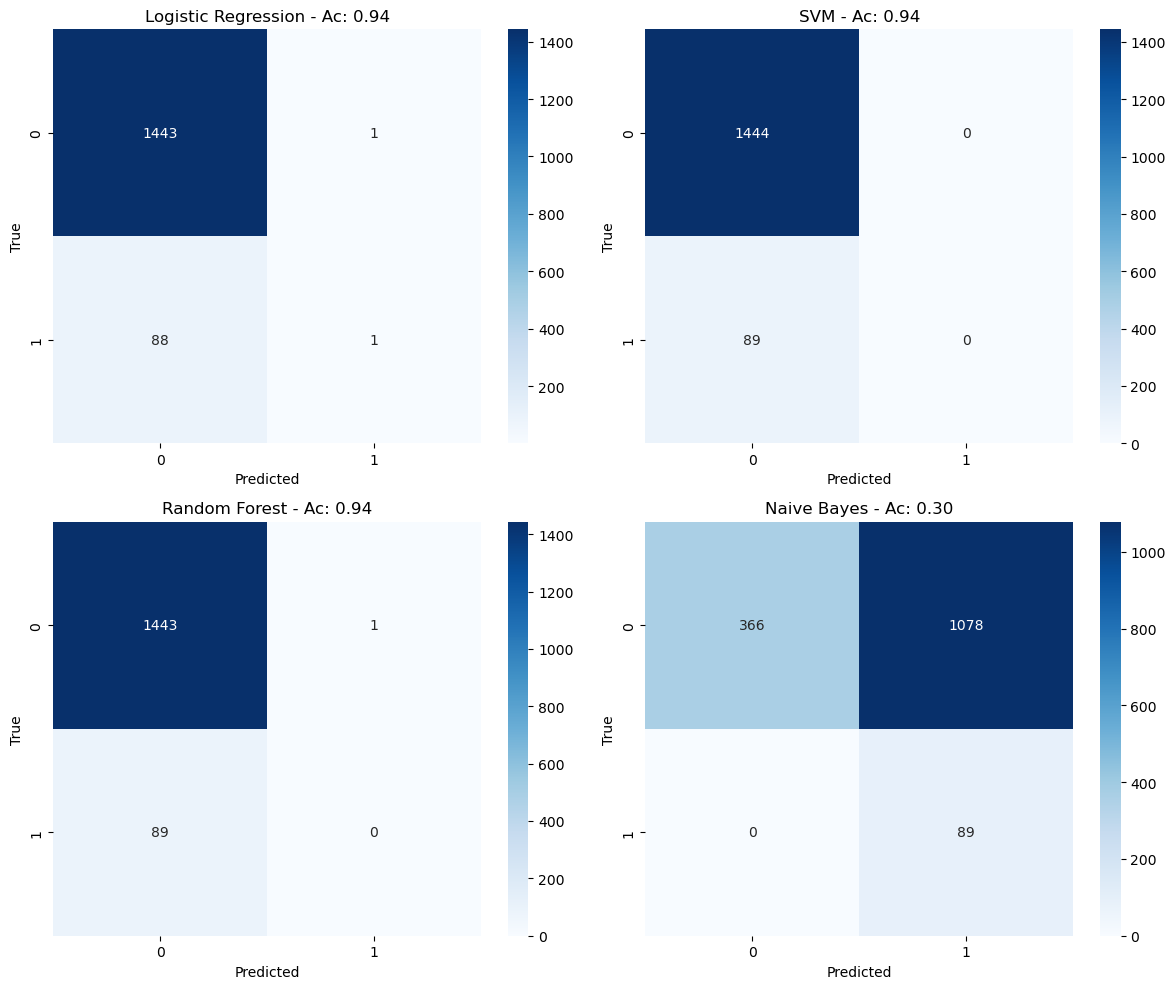

In [24]:



data_set['bmi'] = data_set['bmi'].fillna(data_set['bmi'].mean())


data_encoded = pd.get_dummies(data_set, drop_first=True)


data_encoded = data_encoded.dropna()


X = data_encoded.drop(columns=['stroke'])
y = data_encoded['stroke']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

lr = LogisticRegression(max_iter=1000)
lr.fit(x_train_scaled, y_train)
y_pred_lr = lr.predict(x_test_scaled)
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
accuracy_lr = accuracy_score(y_test, y_pred_lr)


svm = SVC()
svm.fit(x_train_scaled, y_train)
y_pred_svm = svm.predict(x_test_scaled)
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
accuracy_svm = accuracy_score(y_test, y_pred_svm)


rf = RandomForestClassifier()
rf.fit(x_train_scaled, y_train)
y_pred_rf = rf.predict(x_test_scaled)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
accuracy_rf = accuracy_score(y_test, y_pred_rf)


gnb = GaussianNB()
gnb.fit(x_train_scaled, y_train)
y_pred_gnb = gnb.predict(x_test_scaled)
conf_matrix_gnb = confusion_matrix(y_test, y_pred_gnb)
accuracy_gnb = accuracy_score(y_test, y_pred_gnb)


matrices = [conf_matrix_lr, conf_matrix_svm, conf_matrix_rf, conf_matrix_gnb]
accuracies = [accuracy_lr, accuracy_svm, accuracy_rf, accuracy_gnb]
titles = ['Logistic Regression', 'SVM', 'Random Forest', 'Naive Bayes']

# Create a figure with a 2x2 grid
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

# Flatten the axes array for easy iteration
axs = axs.flatten()

# Plot confusion matrices
for ax, cm, title, accuracy in zip(axs, matrices, titles, accuracies):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=ax)
    ax.set_title(f'{title} - Ac: {accuracy:.2f}')
    ax.set_xlabel('Predicted')
    ax.set_ylabel('True')

plt.tight_layout()
plt.show()


In [ ]:
## Result Compresion Between All Featurs and Selected Features


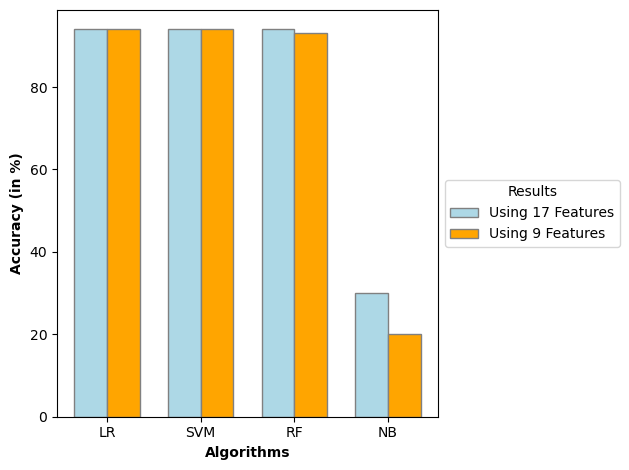

Accuracy with all features: [94.0, 94.0, 94.0, 30.0]
Accuracy with selected features: [94.0, 94.0, 93.0, 20.0]


In [1]:
import numpy as np
import matplotlib.pyplot as plt


algorithms = ['LR', 'SVM', 'RF', 'NB']

accuracy_all_features = [0.94 * 100, 0.94 * 100, 0.94 * 100, 0.30 * 100]

accuracy_selected_features = [0.94 * 100, 0.94 * 100, 0.93 * 100, 0.20 * 100]


bar_width = 0.35

# Positions for each bar on the x-axis
r1 = np.arange(len(algorithms))
r2 = [x + bar_width for x in r1]


plt.bar(r1, accuracy_all_features, color='lightblue', width=bar_width, edgecolor='grey', label='Using 17 Features')
plt.bar(r2, accuracy_selected_features, color='orange', width=bar_width, edgecolor='grey', label='Using 9 Features')

# Add labels
plt.xlabel('Algorithms', fontweight='bold')
plt.ylabel('Accuracy (in %)', fontweight='bold')
plt.xticks([r + bar_width / 2 for r in range(len(algorithms))], algorithms)


plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), title="Results")


plt.tight_layout()

# Display the chart
plt.show()

# Print accuracy values
print("Accuracy with all features:", accuracy_all_features)
print("Accuracy with selected features:", accuracy_selected_features)
